<a href="https://colab.research.google.com/github/sandeepbansode/Machine_Learning_Data_Science/blob/main/ML_19_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Files/column_2C_weka.csv')

In [ ]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [ ]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

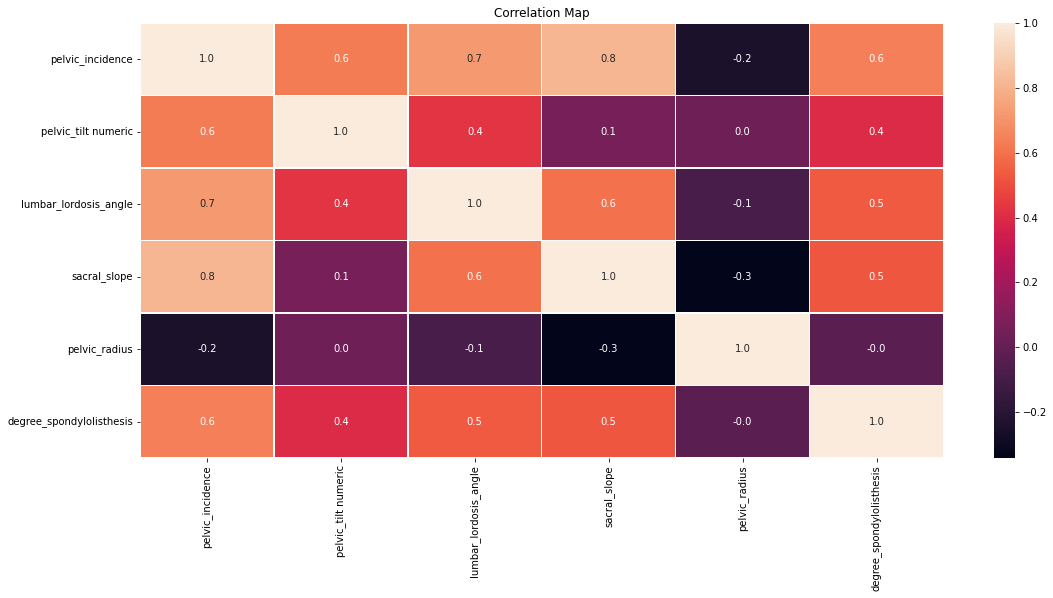

In [ ]:
f,ax=plt.subplots(figsize = (18,8))
# corr() is actually pearson correlation
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [ ]:
A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]

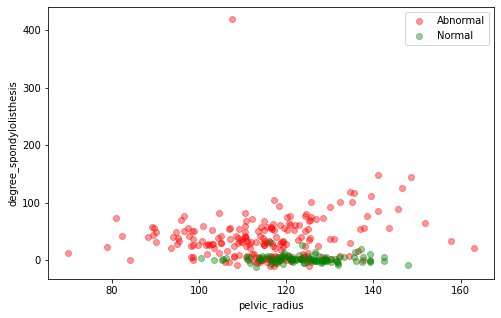

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(A.pelvic_radius,A.degree_spondylolisthesis,label= "Abnormal", color="red", alpha=0.4 )
plt.scatter(N.pelvic_radius,N.degree_spondylolisthesis, label = "Normal", color="green", alpha=0.4)
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.legend()
plt.show()

In [ ]:
# string to integer
# Abnormal to 0
# Normal to 1
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
y = data["class"].values

In [ ]:
x_data = data.drop(["class"], axis= 1)
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# **Normalisation**

In [ ]:

# copy the data
df_min_max_scaled = x_data.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)


x = df_min_max_scaled

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.355688             0.519900               0.229180   
1            0.124501             0.296783               0.098578   
2            0.411666             0.513932               0.322995   
3            0.416151             0.557414               0.271260   
4            0.227272             0.289479               0.128129   
..                ...                  ...                    ...   
305          0.209822             0.360293               0.196881   
306          0.268009             0.487194               0.136211   
307          0.340438             0.522443               0.287897   
308          0.184257             0.272352               0.246846   
309          0.074202             0.207709               0.202620   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
0        0.250857       0.307461                  0.025148  
1        0.144629       0.476649                 

In [ ]:
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

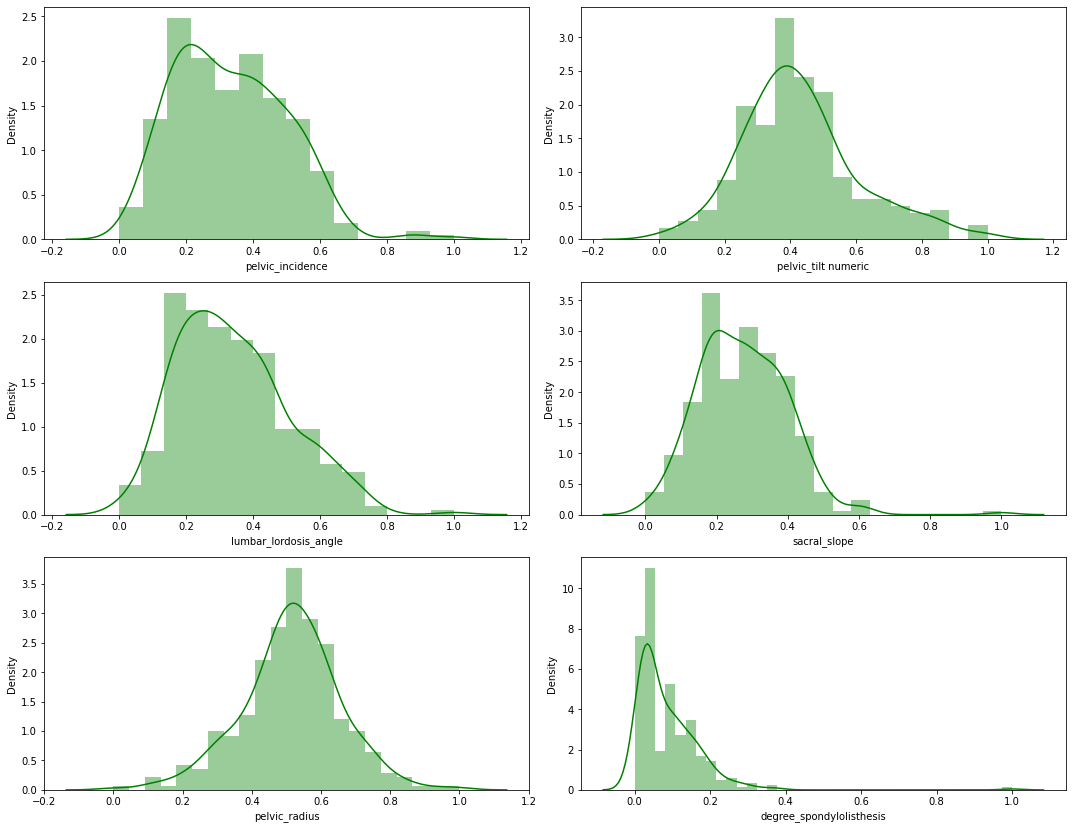

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for i in df_min_max_scaled:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(df_min_max_scaled[i],color='green')#to know distribution
    plotnum+=1#increment counter
plt.tight_layout() 

In [ ]:
# Train Test Split from Sklearn
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# **KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.7526881720430108 


# **Finding Best K Value**

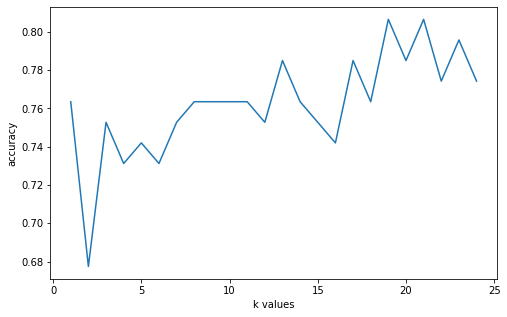

In [ ]:
score_list = []
for each in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.figure(figsize=(8,5))    
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(19,knn.score(x_test,y_test)))

 19 nn score: 0.8064516129032258 


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(19,knn.score(x_test,y_test)))

 19 nn score: 0.8064516129032258 


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(19,knn.score(x_test,y_test)))

 19 nn score: 0.7956989247311828 
